# Assignment for Programming for Data Analysis

**Synthesize a data set of a real-world phenomenom and evaluate**


As my dataset for this I have chosen to look at the home and away records of each Premiership football match from the 2000-2001 season until 2017-2018 season. I will be examining the relationship between playing at home (versus away) and how it relates to goals scored and cards given.

I obtained this dataset on [Kwaggle](https://www.kaggle.com/datasets/saife245/english-premier-league). I have downloaded it as csv file to my project folder. 

This dataset contains stats from every Premier League game since the beginning of the 00-01 season. For the purposes of this project I will only be looking at 'Home goals scored', 'Away goals scored', 'Home Team Bookings Points' and 'Away Team Bookings Points'.

Booking points are calculated as follows; Each yellow card that is received is worth 10 points and each red card is worth 25.

Once I understand the relationship between these factors, I will synthesize this data myself.

In [1]:
# First of all I am going to import the libraries that I will be using for this task. 

import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# I have saved the dataset in the same folder as my notebook. I am going to import it to the notebook 

footballdf = pd.read_csv('final_dataset.csv')

In [3]:
#Going to review the dataset to see it is what is expected
footballdf.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/2000,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/2000,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/2000,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/2000,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/2000,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


This dataset contains 45 different variables. For the purpose of this project I will only be looking at 4 'Home goals scored', 'Away goals scored', 'Home Team Bookings Points' and 'Away Team Bookings Points'. In the dataset these variables have the below names.

- FTHG = Full Time Home Team Goals
- FTAG = Full Time Away Team Goals
- HBP = Home Team Bookings Points
- ABP = Away Team Bookings Point

I will create a new dataset with just these variables.

In [4]:
prem_df = footballdf[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HBP', 'ABP']]
prem_df.info()
prem_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      6840 non-null   object
 1   HomeTeam  6840 non-null   object
 2   AwayTeam  6840 non-null   object
 3   FTHG      6840 non-null   int64 
 4   FTAG      6840 non-null   int64 
 5   HBP       6840 non-null   int64 
 6   ABP       6840 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 374.2+ KB


,Date,HomeTeam,AwayTeam,FTHG,FTAG,HBP,ABP
0,19/08/2000,Charlton,Man City,4,0,10,20
1,19/08/2000,Chelsea,West Ham,4,2,10,20
2,19/08/2000,Coventry,Middlesbrough,1,3,75,30
3,19/08/2000,Derby,Southampton,2,2,10,10
4,19/08/2000,Leeds,Everton,2,0,10,30


This dataframe shows the information we want. There are 6840 rows each representing one match that occurred and we can see columns showing what teams played, the goals scored for the home team (FTHG), the goals scored for the away team (FTAG) the booking points for the home team (HBP) and the booking points for the away team (ABP).

<BarContainer object of 1 artists>

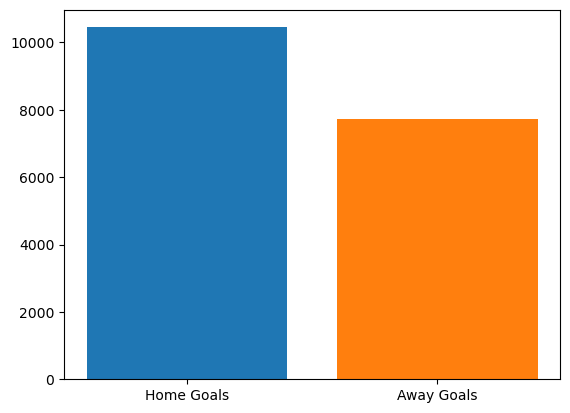

In [5]:
fig, ax = plt.subplots()

total_home_goals = prem_df['FTHG'].sum()
total_away_goals = prem_df['FTAG'].sum()

ax.bar('Home Goals', total_home_goals, label = 'Home Goals')
ax.bar('Away Goals', total_away_goals, label = 'Away Goals')

<BarContainer object of 1 artists>

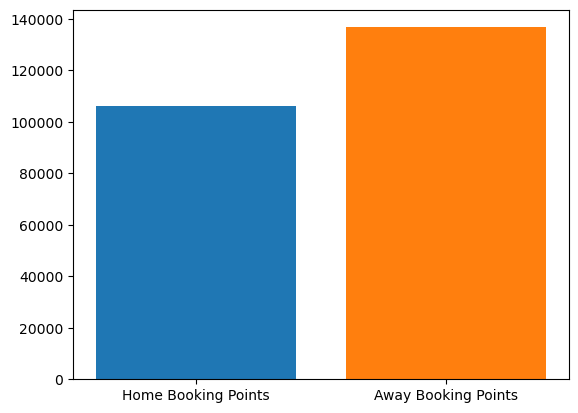

In [6]:
fig, ax = plt.subplots()

total_home_bp = prem_df['HBP'].sum()
total_away_bp = prem_df['ABP'].sum()

ax.bar('Home Booking Points', total_home_bp, label = 'Home Booking Points')
ax.bar('Away Booking Points', total_away_bp, label = 'Away Booking Points')

From looking at the above we can see the advantageous relationship of teams playing at home. 


In [7]:
#Calculate the average goal per game at home versus away and the average booking points at home versus away

average_home_goal = total_home_goals/6840
average_away_goal = total_away_goals/6840
average_home_bp = total_home_bp/6840
average_away_bp = total_away_bp/6840

print(average_home_goal)
print(average_away_goal)
print(average_home_bp)
print(average_away_bp)


1.527485380116959
1.1302631578947369
15.50219298245614
19.99342105263158


In [8]:
home_goals = prem_df['FTHG']
away_goals = prem_df['FTAG']

home_bp = prem_df['HBP']
away_bp = prem_df['ABP']



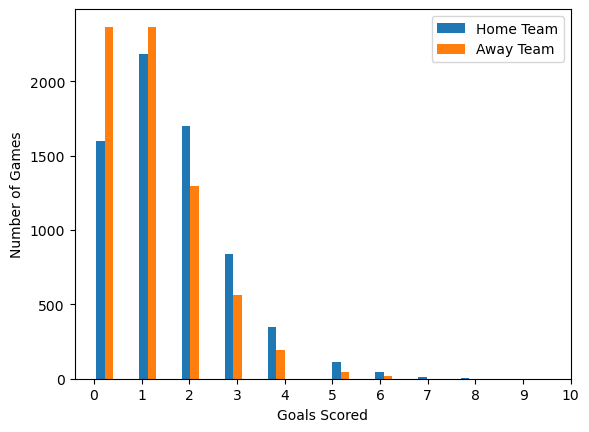

In [9]:
#Create a histogram showing the distribution of goals scored both home and away

plt.hist([home_goals, away_goals], 20, label = ['Home Team', 'Away Team'])
plt.xticks(range(0, 11))
plt.ylabel("Number of Games")
plt.xlabel("Goals Scored")
plt.legend()

From inspecting the above histogram the shape seems to fit a positive skewed distribution

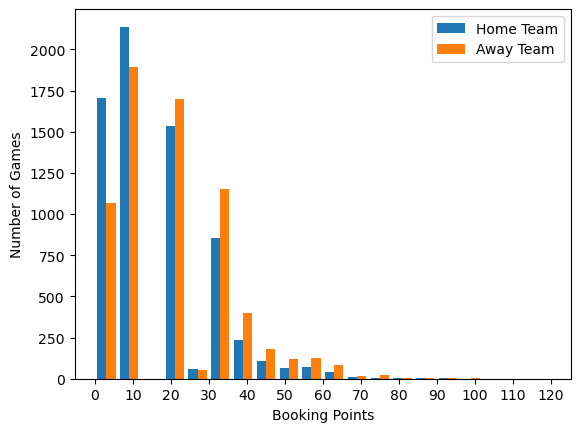

In [10]:
#Create a histogram showing the distribution of booking points both home and away

plt.hist([home_bp, away_bp], 20, label = ['Home Team', 'Away Team'])
plt.xticks(range(min(home_bp), max(away_bp)+1, 10))
plt.ylabel("Number of Games")
plt.xlabel("Booking Points")
plt.legend()

When looking at the above historgrams, it looks like all of our variables follow a poisson distribution. 

["A Poisson distribution is a discrete probability distribution, meaning that it gives the probability of a discrete (i.e., countable) outcome. For Poisson distributions, the discrete outcome is the number of times an event occurs, represented by k."](https://www.scribbr.com/statistics/poisson-distribution/#:~:text=A%20Poisson%20distribution%20is%20a,the%20mean%20number%20of%20events.)

In our dataset the events taking place are the goals scored or booking points awarded.  In order to create a Poisson distribution we need to know the mean, or Lambda ( $\lambda$)

The equation for the poisson distribution is below:

$$ f(\kappa;\lambda) = \frac{\lambda^k.e^{-\lambda}}{\kappa!}$$

In [11]:
home_goals.describe()

count    6840.000000
mean        1.527485
std         1.297913
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: FTHG, dtype: float64

For our Variable Home_goals, we know;

- the standard deviation : 1.297913
- mean: 1.527485

We now take a look at the mean and variance (the square of the standard deviation) of goals scored. We are hoping to see these two values to be equal, since we know that the mean and variance of a Poisson random variable are the same.

In [45]:
#Mean and Variance of home goals scored

print(f'The Mean is {home_goals.mean()}')
print(f'The Variance is {home_goals.var()}')


The Mean is 1.527485380116959
The Variance is 1.6845785565927742


While the mean and variance values aren't exactly the same they are still relatively close. Given the graphical analysis done above I think it is fair to say this variable fits within a Poisson Distribution

In [13]:
away_goals.describe()

count    6840.000000
mean        1.130263
std         1.124566
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: FTAG, dtype: float64

In [43]:
#Mean and Variance of away goals scored

print(f'The Mean is {away_goals.mean()}')
print(f'The Variance is {away_goals.var()}')

The Mean is 1.1302631578947369
The Variance is 1.2646491484597284


Again the mean and variance are close enough to fit a Poisson Distribution.

In [46]:
home_bp.describe()

count    6840.000000
mean       15.502193
std        13.946139
min         0.000000
25%        10.000000
50%        10.000000
75%        20.000000
max        90.000000
Name: HBP, dtype: float64

In [47]:
#Mean and Variance of away goals scored

print(f'The Mean is {home_bp.mean()}')
print(f'The Variance is {home_bp.var()}')

The Mean is 15.50219298245614
The Variance is 194.4948043727499


In [15]:
away_bp.describe()

count    6840.000000
mean       19.993421
std        15.541240
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max       120.000000
Name: ABP, dtype: float64

In [16]:
mean_home_goals = 1.527485
mean_away_goals = 1.130263
mean_home_bp = 15.502193
mean_away_bp = 19.993421

What do we know about the distribution of the variables so far.

#Find out the known constant mean rate for BP, and use the poisson distribution for synthesising the database with this info
find the average goals scored/bp for each match = k rng.poisson (k, 6480)

In [65]:
df1 = np.random.poisson(mean_home_goals, 6480)

#New Home Goals (NHG) generated variable
NHG = pd.DataFrame(df1)
NHG.describe()



,0
0,1
1,1
2,1
3,0
4,0


In [66]:
df2 = np.random.poisson(mean_away_goals, 6480)

# New Away Goals (NAG) generated variable
NAG = pd.DataFrame(df2)
NAG.describe()

,0
0,0
1,1
2,0
3,1
4,2


<BarContainer object of 1 artists>

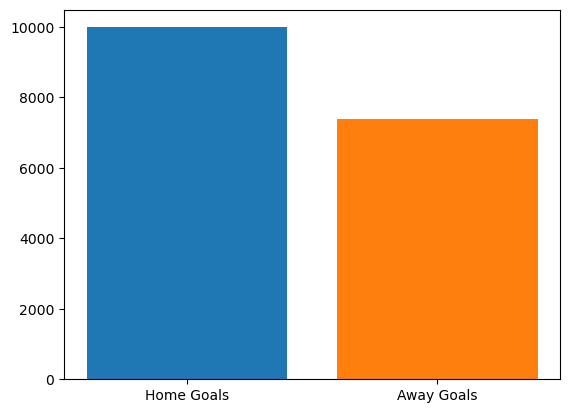

In [53]:
fig, ax = plt.subplots()

new_total_home_goals = NHG.sum()
new_total_away_goals = NAG.sum()

ax.bar('Home Goals', new_total_home_goals, label = 'Home Goals')
ax.bar('Away Goals', new_total_away_goals, label = 'Away Goals')

In [68]:
#Create a histogram showing the distribution of goals scored both home and away
new_df= NHG.join(NAG)

new_df.head()

ValueError: columns overlap but no suffix specified: RangeIndex(start=0, stop=1, step=1)

In [19]:
df3 = np.random.poisson(mean_home_bp, 6480)

# New Home Booking Points (NHBP) generated variable
NHBP = pd.DataFrame(df3)
NHBP.describe()

,0
count,6480.000000
mean,15.419907
std,3.934728
min,3.000000
25%,13.000000
50%,15.000000
75%,18.000000
max,31.000000


In [20]:
df3 = np.random.poisson(mean_away_bp, 6480)

# New Home Booking Points (NHBP) generated variable
NHBP = pd.DataFrame(df3)
NHBP.head()

,0
0,25
1,19
2,25
3,11
4,22


In [21]:
booking points should be in multiple of 5

SyntaxError: invalid syntax (1852842592.py, line 1)

References

"We now take a look at the mean and variance (the square of the standard deviation) of Man Utd’s scoring rate. We are hoping to see these two values to be equal, since we know that the mean and variance of a Poisson random variable are the same."

https://bookdown.org/theqdata/honors_thesis/introduction.html

## **END**